In [4]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.corpus import stopwords

# Aprofundando o conhecimento sobre a base de dados e os alunos registrados no DataFrame.

In [5]:
file_path = '/content/TbAluno.csv'

df = pd.read_csv(file_path, sep=',')

df.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
0,3,Aluno 1,0,1,F,5,2005-03-29 03:00:00,0,5,5,...,False,False,False,False,False,False,False,False,False,NaN
1,4,Aluno 2,0,1,F,5,2004-11-04 02:00:00,6,NaN,6,...,False,False,False,False,False,False,False,False,False,NaN
2,5,Aluno 3,0,1,F,5,2002-01-25 02:00:00,0,NaN,7,...,False,False,False,False,False,False,False,False,False,NaN
3,6,Aluno 4,0,1,M,5,2002-10-07 03:00:00,0,8,8,...,False,False,False,False,False,False,False,False,False,NaN
4,7,Aluno 5,0,1,M,5,2002-12-23 02:00:00,0,9,9,...,False,False,False,False,False,False,False,False,False,NaN


In [6]:
df.head()

,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
2233,2258,Aluno 2234,0,1,M,5,2009-05-04 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2234,2259,Aluno 2235,0,1,M,5,2009-10-21 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2235,2260,Aluno 2236,0,1,F,5,2008-03-12 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2236,2261,Aluno 2237,0,1,M,5,2014-05-15 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2237,2262,Aluno 2238,0,1,M,5,2015-01-27 00:00:00,1769,NaN,1769,...,False,False,False,False,False,False,False,False,False,NaN


In [7]:
df.tail()


,IdAluno,NomeAluno,NomeAbreviado,IdUnidade,Sexo,EstadoCivil,DataNascimento,IdPai,IdMae,IdResponsavel,...,StRecursoLeituraLabial,StRecursoMaterialDidaticoProvaBraille,StRecursoProvaAmpliada,StRecursoProvaSuperampliada,StRecursoCdComAudio,StRecursoLinguaPortuguesaSegundaLingua,StRecursoProvaEmVideo,StPermiteUsoImagem,StEstrangeiro,Unnamed: 55
2233,2258,Aluno 2234,0,1,M,5,2009-05-04 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2234,2259,Aluno 2235,0,1,M,5,2009-10-21 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2235,2260,Aluno 2236,0,1,F,5,2008-03-12 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2236,2261,Aluno 2237,0,1,M,5,2014-05-15 00:00:00,0,NaN,1559,...,False,False,False,False,False,False,False,False,False,NaN
2237,2262,Aluno 2238,0,1,M,5,2015-01-27 00:00:00,1769,NaN,1769,...,False,False,False,False,False,False,False,False,False,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2238 entries, 0 to 2237
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   IdAluno                                 2238 non-null   int64 
 1   NomeAluno                               2238 non-null   object
 2   NomeAbreviado                           2238 non-null   int64 
 3   IdUnidade                               2238 non-null   int64 
 4   Sexo                                    2237 non-null   object
 5   EstadoCivil                             2238 non-null   int64 
 6   DataNascimento                          2238 non-null   object
 7   IdPai                                   2238 non-null   int64 
 8   IdMae                                   1218 non-null   object
 9   IdResponsavel                           2238 non-null   int64 
 10  IdTipoResponsavel                       2238 non-null   int64 
 11  Natu

In [10]:
df.describe()

,IdAluno,NomeAbreviado,IdUnidade,EstadoCivil,IdPai,IdResponsavel,IdTipoResponsavel,TipoSangue,PlanoSaude,Alergia,Medicamento,IdEstabelecimentoEnsinoAnterior,IdReligiao,AnoConclusao,EnsinoMedio_IdEstabelecimentoEnsino,NomeCivil,IdTipoResponsavelMae
count,2238.000000,2238.0,2238.000000,2238.000000,2238.000000,2238.000000,2238.000000,2238.0,2238.0,2238.0,2238.0,2238.0,2238.0,2238.0,2238.0,2238.0,2238.000000
mean,1130.315013,0.0,0.999553,4.555407,473.956211,855.506256,3.138070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.451743
std,654.486109,0.0,0.021138,1.423450,675.461390,523.078839,14.478266,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.055096
min,3.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,563.250000,0.0,1.000000,5.000000,0.000000,392.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,1125.500000,0.0,1.000000,5.000000,0.000000,855.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,1699.750000,0.0,1.000000,5.000000,1249.750000,1322.750000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,2262.000000,0.0,1.000000,5.000000,1770.000000,1770.000000,676.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.000000


In [11]:
df.nunique()

,0
IdAluno,2238
NomeAluno,2238
NomeAbreviado,1
IdUnidade,2
Sexo,2
EstadoCivil,2
DataNascimento,1919
IdPai,700
IdMae,988
IdResponsavel,1714


In [12]:
df.isnull().sum()

,0
IdAluno,0
NomeAluno,0
NomeAbreviado,0
IdUnidade,0
Sexo,1
EstadoCivil,0
DataNascimento,0
IdPai,0
IdMae,1020
IdResponsavel,0


In [15]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
2233,False
2234,False
2235,False
2236,False


# Explorando a idade dos alunos.

In [26]:
df['DataNascimento'] = pd.to_datetime(df['DataNascimento'], errors='coerce')

hoje = pd.to_datetime('today')
df['Idade'] = (hoje - df['DataNascimento']).dt.days // 365

idade_min = int(df['Idade'].min())
idade_max = int(df['Idade'].max())

faixas = [(i, i+9) for i in range(idade_min, idade_max, 10)]
faixas.append((idade_max, idade_max + 9))

resultados = []
for faixa in faixas:
    count = df[(df['Idade'] >= faixa[0]) & (df['Idade'] <= faixa[1])].shape[0]
    resultados.append({'Idade': f'{faixa[0]}-{faixa[1]}', 'Quantidade': count})

nao_informado = df[df['Idade'].isna()].shape[0]
resultados.append({'Idade': 'Não Informado', 'Quantidade': nao_informado})

df_resultados = pd.DataFrame(resultados)

df_resultados.to_csv('faixas_idade.csv', index=False)

print(df_resultados)

           Idade  Quantidade
0           1-10         471
1          11-20        1664
2          21-30         101
3          31-40           1
4          36-45           1
5  Não Informado           1


In [29]:
file_path = "/content/TbDiarioAula.xlsx"
df_diarioaula = pd.read_excel(file_path)

df_diarioaula.head()


,IdDiarioAula,IdDiario,NumeroAula,DataAula,ConteudoMinistrado,Tarefa,IdProfessor,StChamadaOnlineAtivada,DataHoraLimiteChamadaOnline,NumeroAulaMigracao,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,4,65,1,2021-08-25 00:00:00,ÂNGULOS,LISTA DE EXERCICIOS,8,False,NaN,NaN,NaN,NaN,NaN,NaN
1,6,199,5,2021-08-27 00:00:00,"Números decimais, correção das páginas 82 e 83...",página 84 e 85 da apostila,6,False,NaN,NaN,NaN,NaN,NaN,NaN
2,7,214,5,2021-08-27 00:00:00,"Números decimais, correção das páginas 83 e 84...",página 85 da apostila,6,False,NaN,NaN,NaN,NaN,NaN,NaN
3,8,38,1,2021-08-04 00:00:00,Unit 6 - Part 6A Review - Extra questions - To...,Watch a movie to practice the listening,11,False,NaN,NaN,NaN,NaN,NaN,NaN
4,9,38,2,2021-08-11 00:00:00,"Unit 6 - Part 6B Review - Questions using ""be ...",Online Exercises 1 - Listening - https://www.t...,11,False,NaN,NaN,NaN,NaN,NaN,NaN


# Aprofundando a análise do diário de aula dos alunos, identificando as palavras mais frequentes nas observações, com o objetivo de revelar padrões e tendências no registro pedagógico. Essa abordagem busca constatar aspectos relevantes do processo educacional, como o foco das atividades propostas, temas recorrentes e possíveis áreas de melhoria no acompanhamento dos estudantes.

In [5]:
file_path = "/content/TbDiarioAula.xlsx"
df_diarioaula = pd.read_excel(file_path)

def limpar_texto(texto):
    if isinstance(texto, str):
        texto = texto.lower()
        texto = re.sub(r'[^\w\s]', '', texto)
    else:
        texto = ""
    return texto

df_diarioaula['Tarefa_limpia'] = df_diarioaula['Tarefa'].apply(limpar_texto)

df_diarioaula['Tarefa_limpia'].head()

,Tarefa_limpia
0,lista de exercicios
1,página 84 e 85 da apostila
2,página 85 da apostila
3,watch a movie to practice the listening
4,online exercises 1 listening httpswwwtedcomt...


In [14]:
nltk.download('stopwords')

stop_words = set(stopwords.words('portuguese'))

stop_words.update({
    'a', 'de', 'da', 'do', 'das', 'dos', 'e', 'o', 'ou', 'mas', 'para', 'em', 'com', 'por',
    'que', 'se', 'não', 'os', 'as', 'um', 'uma', 'na', 'no', 'nas', 'nos', 'aos', 'às',
    'é', 'i', 'u', 'eu', 'ele', 'ela', 'você', 'me', 'te', 'nos', 'tá', 'sim', 'não'
})

texto_completo = ' '.join(df_diarioaula['Tarefa_limpia'].dropna())

texto_completo = re.sub(r'[^\w\s:/.-]', '', texto_completo.lower())

palavras = texto_completo.split()

palavras_filtradas = [
    palavra for palavra in palavras
    if palavra not in stop_words and len(palavra) > 3 and not palavra.isdigit()
]

contagem_palavras = Counter(palavras_filtradas)

palavras_mais_comuns = sorted(
    contagem_palavras.items(), key=lambda x: x[1], reverse=True
)

for palavra, freq in palavras_mais_comuns[:20]:
    print(f"'{palavra}': {freq},")


'exercícios': 3263,
'casa': 3179,
'apostila': 3018,
'atividade': 2729,
'caderno': 2249,
'lição': 2214,
'sobre': 1669,
'aula': 1660,
'páginas': 1446,
'atividades': 1387,
'caligrafia': 1365,
'lista': 1340,
'leitura': 1258,
'homework': 1242,
'página': 1134,
'matemática': 1008,
'palavras': 998,
'livro': 974,
'próxima': 873,
'texto': 823,


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Contagem de palavras: Counter({'exercícios': 3263, 'casa': 3179, 'apostila': 3018, 'atividade': 2729, 'caderno': 2249, 'lição': 2214, 'sobre': 1669, 'aula': 1660, 'páginas': 1446, 'atividades': 1387, 'caligrafia': 1365, 'lista': 1340, 'leitura': 1258, 'homework': 1242, 'página': 1134, 'matemática': 1008, 'palavras': 998, 'livro': 974, 'próxima': 873, 'texto': 823, 'portuguesa': 784, 'língua': 778, 'tarefa': 751, 'cérebro': 648, 'entrega': 643, 'letra': 603, 'poliedro': 600, 'escreva': 588, 'números': 586, 'faça': 544, 'interpretação': 539, 'folha': 524, 'fixação': 521, 'problemas': 502, 'família': 495, 'entregar': 488, 'realizar': 462, 'fortalacendo': 450, 'semanal': 444, 'desenho': 429, 'frases': 428, 'realize': 422, 'subtração': 416, 'alfabeto': 408, 'projeto': 396, 'adição': 384, 'estudar': 373, 'mágica': 357, 'nome': 346, 'fazer': 345, 'revisão': 339, 'gênio': 337, 'continuação': 331, 'tornando': 318, 'cursiva': 302, 'português': 301, 'vídeo': 285, 'cada': 284, 'pinte': 280, 'coord

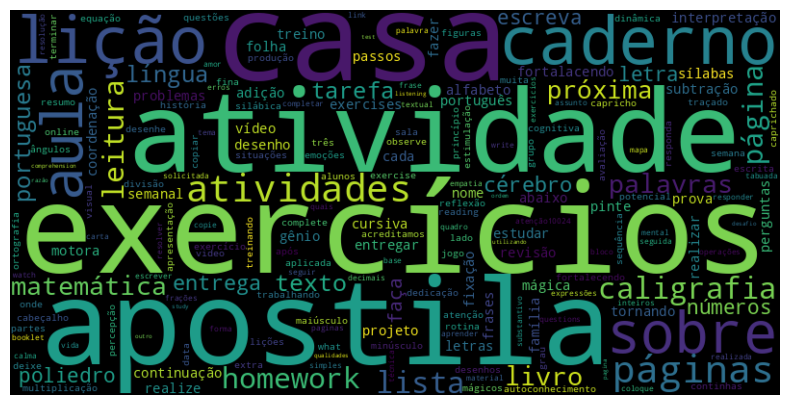

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

print("Contagem de palavras:", contagem_palavras)


if contagem_palavras:

    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(contagem_palavras)


    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()
else:
    print("Nenhuma palavra válida encontrada para gerar a nuvem de palavras.")


In [17]:
df_palavras = pd.DataFrame(contagem_palavras.items(), columns=['Palavra', 'Frequência'])

df_palavras = df_palavras.sort_values(by='Frequência', ascending=False)

caminho_arquivo = 'contagem_palavras.xlsx'
df_palavras.to_excel(caminho_arquivo, index=False)